**To begin, we need to  do the necessary imports and read in the two csv files.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfComposite = pd.read_csv('data/NASA_Exoplanet_Composite.csv')
dfPlanetary = pd.read_csv('data/NASA_Exoplanet_Planetary.csv', low_memory=False)

light_year = pd.read_csv('data/light_year.csv')
Filtered = pd.read_csv('data/Filtered.csv')


**To protect the data I will be working with copies of each csv.**

In [2]:
Composite = dfComposite.copy()
Planetary = dfPlanetary.copy()


**Exoplanets have a great many characteristics which NASA has briefly summarized in an animated video which can be seen below. I have a link to this in my readme as well.**

In [3]:
%%HTML
<iframe width="414" height="250"
 src="https://www.youtube.com/embed/4IXYp9Fse44"
</iframe>

**Let's take a look at some of the planetary data that is available for this project**

In [4]:
Planetary.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,23-07-2014,2011-08,23-07-2014,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,14-05-2014,2008-01,14-05-2014,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,25-04-2018,2011-08,23-07-2014,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,04-09-2018,2017-03,06-09-2018,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,25-04-2018,2009-10,14-05-2014,0,1,1,0,0,0


In [5]:
Composite.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,6.095,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0


**There is quite a bit of information in each of these CSV files.  So, let's clean it up by keeping the first instance of each planet that is contained in the Planetary csv file.**

In [6]:
Planetary = Planetary.drop_duplicates(subset=['pl_name'], keep='first')
display(Planetary)

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,23-07-2014,2011-08,23-07-2014,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,25-04-2018,2011-08,23-07-2014,0,1,1,0,0,0
5,6,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,0,1,...,NaN,23-07-2014,2011-08,23-07-2014,0,1,1,0,0,0
7,8,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,...,NaN,12-06-2023,2022-09,12-06-2023,0,1,4,1,0,0
15,16,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,0,3,...,NaN,25-04-2018,1997-07,21-08-2014,5,1,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,34930,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,0,2,...,NaN,09-11-2016,1997-01,10-11-2016,5,1,10,1,0,0
34936,34937,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,0,2,...,NaN,03-08-2021,2010-06,03-08-2021,5,1,10,1,0,0
34942,34943,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,0,2,...,NaN,20-09-2021,2021-05,20-09-2021,5,1,10,1,0,0
34948,34949,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,NaN,10-01-2022,2021-12,10-01-2022,0,0,0,0,0,0


**To clean the data further, let's keep the columns that will be needed for this and future projects.**

In [7]:
columns = ['pl_name', 'hostname', 'pl_letter', 'hd_name', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'discoverymethod', 'disc_year', 'disc_locale', 'disc_facility', 'disc_telescope', 'pl_orbper' ]
Composite = Composite[columns] 

columns = ['pl_name','pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_masse', 'pl_dens', 'pl_orbeccen', 'pl_eqt', 'pl_trandur', 'pl_ratdor', 'pl_ratror', 'pl_occdep', 'st_rad', 'st_age', 'st_dens']
Planetary = Planetary[columns] 


**The next step is to merge the data.  There are some columns which have no values so seeing NaN can still provide information.  For example, the column "pl_trandur" has NaN for quite a few entries.  This may mean that we don't yet know how long it will take to cross a stellar limb. The term "stellar limb" refers to the edge of a star's disc, where the edge gradually gets darker.**

In [8]:
merged_df = Composite.merge(Planetary, left_on='pl_name', right_on='pl_name',
          suffixes=('_Planetary ', '_Composite'))
display(merged_df)

,pl_name,hostname,pl_letter,hd_name,gaia_id,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,...,pl_dens,pl_orbeccen,pl_eqt,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,st_rad,st_age,st_dens
0,11 Com b,11 Com,b,HD 107383,Gaia DR2 3946945413106333696,2,1,0,Radial Velocity,2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 UMi b,11 UMi,b,HD 136726,Gaia DR2 1696798367260229376,1,1,0,Radial Velocity,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14 And b,14 And,b,HD 221345,Gaia DR2 1920113512486282240,1,1,0,Radial Velocity,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 Her b,14 Her,b,HD 145675,Gaia DR2 1385293808145621504,1,2,0,Radial Velocity,2002,...,NaN,0.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 Cyg B b,16 Cyg B,b,HD 186427,Gaia DR2 2135550755683407232,3,1,0,Radial Velocity,1996,...,NaN,0.634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,ups And b,ups And,b,HD 9826,Gaia DR2 348020448377061376,2,3,0,Radial Velocity,1996,...,NaN,0.109,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN
5479,ups And c,ups And,c,HD 9826,Gaia DR2 348020448377061376,2,3,0,Radial Velocity,1999,...,NaN,0.245,NaN,NaN,NaN,NaN,NaN,1.64,3.12,NaN
5480,ups And d,ups And,d,HD 9826,Gaia DR2 348020448377061376,2,3,0,Radial Velocity,1999,...,NaN,0.294,NaN,NaN,NaN,NaN,NaN,1.62,NaN,NaN
5481,ups Leo b,ups Leo,b,NaN,Gaia DR2 3794167001116433152,1,1,0,Radial Velocity,2021,...,NaN,0.320,NaN,NaN,NaN,NaN,NaN,11.22,NaN,NaN


**As you can see from the output below, there are quite a few planets that we have data for.  However, I want to concentrate on planets with the planetary letters of D.  The planetary letters refer to the order of discovery, for example, "a" planets were found first, "b" planets were next and so on.**

**I will need to make some more changes to the data and filter out everything but the D planets.**
  

In [9]:
print(("The number of B planets is:"), (merged_df['pl_letter'].value_counts()['b']))

print(("The number of C planets is:"), (merged_df['pl_letter'].value_counts()['c']))

print(("The number of D planets is:"), (merged_df['pl_letter'].value_counts()['d']))

print(("The number of E planets is:"), (merged_df['pl_letter'].value_counts()['e']))

print(("The number of F planets is:"), (merged_df['pl_letter'].value_counts()['f']))

print(("The number of G planets is:"), (merged_df['pl_letter'].value_counts()['g']))

print(("The number of H planets is:"), (merged_df['pl_letter'].value_counts()['h']))

print(("The number of I planets is:"), (merged_df['pl_letter'].value_counts()['i']))


df_filtered = merged_df[merged_df['pl_letter'] == 'd']
df_filtered.to_csv('Filtered.csv', index=False)
merged = pd.read_csv('Filtered.csv')
display(merged)


The number of B planets is: 4074
The number of C planets is: 931
The number of D planets is: 307
The number of E planets is: 112
The number of F planets is: 38
The number of G planets is: 15
The number of H planets is: 5
The number of I planets is: 1


,pl_name,hostname,pl_letter,hd_name,gaia_id,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,...,pl_dens,pl_orbeccen,pl_eqt,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,st_rad,st_age,st_dens
0,47 UMa d,47 UMa,d,HD 95128,Gaia DR2 777254360337133312,1,3,0,Radial Velocity,2009,...,NaN,0.160,NaN,NaN,NaN,NaN,NaN,1.21,NaN,0.8366
1,55 Cnc d,55 Cnc,d,HD 75732,Gaia DR2 704967037090946688,2,5,0,Radial Velocity,2002,...,NaN,0.139,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN
2,61 Vir d,61 Vir,d,HD 115617,Gaia DR2 3507879565090229888,1,3,0,Radial Velocity,2009,...,NaN,0.350,NaN,NaN,NaN,NaN,NaN,0.96,8.96,NaN
3,CoRoT-7 d,CoRoT-7,d,NaN,Gaia DR2 3107267177757848576,1,3,0,Radial Velocity,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,NaN
4,DMPP-1 d,DMPP-1,d,HD 38677,Gaia DR2 3011005587574818432,1,4,0,Radial Velocity,2019,...,NaN,0.070,1632.0,NaN,NaN,NaN,NaN,1.26,2.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Wolf 1061 d,Wolf 1061,d,NaN,Gaia DR2 4330690742322011520,1,3,0,Radial Velocity,2015,...,NaN,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,YZ Cet d,YZ Cet,d,NaN,Gaia DR2 2358524597030794112,1,3,0,Radial Velocity,2017,...,NaN,0.020,NaN,NaN,NaN,NaN,NaN,0.17,NaN,NaN
304,pi Men d,HD 39091,d,HD 39091,Gaia DR2 4623036865373793408,1,3,0,Radial Velocity,2022,...,NaN,0.220,NaN,NaN,NaN,NaN,NaN,1.19,3.92,NaN
305,rho CrB d,rho CrB,d,HD 143761,Gaia DR2 1323427759184545536,1,4,0,Radial Velocity,2023,...,NaN,0.000,NaN,NaN,NaN,NaN,NaN,1.34,10.20,NaN


**The csv files did not have the distance from the Earth, so that will be added now.  I created an Excel document which I saved as a .csv file.  Below I will merge the two and create a file which I will use to do my visualizations.**

In [10]:
merged_ly_df = Filtered.merge(light_year, left_on='pl_name', right_on='pl_name',
          suffixes=('_Filtered ', '_light_year'))
merged_ly_df.to_csv('ly_Filtered.csv', index=False)
merged = pd.read_csv('ly_Filtered.csv')         
display(merged_ly_df)

,pl_name,hostname,pl_letter,hd_name,gaia_id,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,...,pl_eqt,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,st_rad,st_age,st_dens,lightyears,planet Type
0,47 UMa d,47 UMa,d,HD 95128,Gaia DR2 777254360337133312,1,3,0,Radial Velocity,2009,...,NaN,NaN,NaN,NaN,NaN,1.21,NaN,0.8366,45,Gas Giant
1,55 Cnc d,55 Cnc,d,HD 75732,Gaia DR2 704967037090946688,2,5,0,Radial Velocity,2002,...,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,41,Gas Giant
2,61 Vir d,61 Vir,d,HD 115617,Gaia DR2 3507879565090229888,1,3,0,Radial Velocity,2009,...,NaN,NaN,NaN,NaN,NaN,0.96,8.96,NaN,28,Neptune-Like
3,CoRoT-7 d,CoRoT-7,d,NaN,Gaia DR2 3107267177757848576,1,3,0,Radial Velocity,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,1.80,NaN,522,Neptune-Like
4,DMPP-1 d,DMPP-1,d,HD 38677,Gaia DR2 3011005587574818432,1,4,0,Radial Velocity,2019,...,1632.0,NaN,NaN,NaN,NaN,1.26,2.01,NaN,204,Super Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Wolf 1061 d,Wolf 1061,d,NaN,Gaia DR2 4330690742322011520,1,3,0,Radial Velocity,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,Neptune-Like
303,YZ Cet d,YZ Cet,d,NaN,Gaia DR2 2358524597030794112,1,3,0,Radial Velocity,2017,...,NaN,NaN,NaN,NaN,NaN,0.17,NaN,NaN,12,Super Earth
304,pi Men d,HD 39091,d,HD 39091,Gaia DR2 4623036865373793408,1,3,0,Radial Velocity,2022,...,NaN,NaN,NaN,NaN,NaN,1.19,3.92,NaN,60,Neptune-Like
305,rho CrB d,rho CrB,d,HD 143761,Gaia DR2 1323427759184545536,1,4,0,Radial Velocity,2023,...,NaN,NaN,NaN,NaN,NaN,1.34,10.20,NaN,57,Neptune-Like


**Now we need to visualize the data, Tableau will be used for the following:**
1) **Suns, moons, and planets in the stellar system**
2) **This shows what type of planet each is and how long it takes to orbit around the host star or system**
3) **The name of the planet and how many light years from earth**
4) **Ages of the planet's host star**

**The link to the Tableau dashboard can be found [here](https://public.tableau.com/app/profile/barbara.adkins/vizzes) and also in the readme.**

**I have also used matplotlib to do a visualization with the names of the first 30 planets and the corresponding planet type.  Below that are two graphics created using Seaborn. The first is shows the planet's mass per unit (pl_dens) and the respective planet name.  The last graphic shows, for the first 15 entries, the mass per unit (pl_dens) and the amount that a planet deviates from  a perfect circle (pl_orbeccen).**

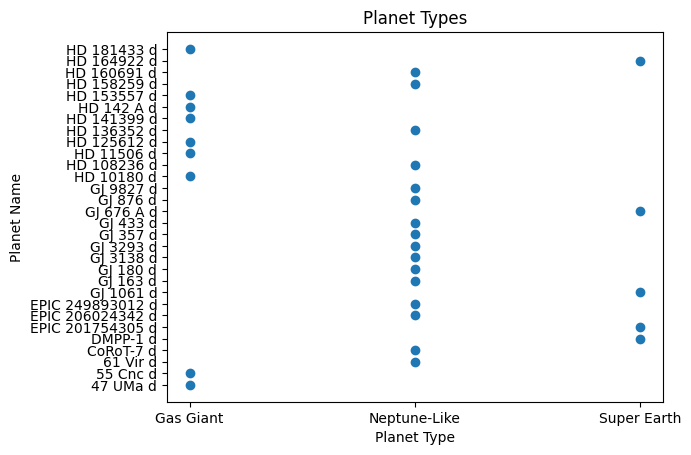

In [11]:
planets = ["47 UMa d", "55 Cnc d", "61 Vir d", "CoRoT-7 d", "DMPP-1 d", "EPIC 201754305 d", "EPIC 206024342 d", "EPIC 249893012 d", "GJ 1061 d", "GJ 163 d", "GJ 180 d", "GJ 3138 d", "GJ 3293 d", "GJ 357 d", "GJ 433 d", "GJ 676 A d", "GJ 876 d", "GJ 9827 d", "HD 10180 d", "HD 108236 d", "HD 11506 d", "HD 125612 d", "HD 136352 d", "HD 141399 d", "HD 142 A d", "HD 153557 d", "HD 158259 d", "HD 160691 d", "HD 164922 d", "HD 181433 d"]

planet_types = ["Gas Giant", "Gas Giant", "Neptune-Like", "Neptune-Like", "Super Earth", "Super Earth", "Neptune-Like", "Neptune-Like", "Super Earth",  "Neptune-Like", "Neptune-Like", "Neptune-Like", "Neptune-Like", "Neptune-Like", "Neptune-Like", "Super Earth", "Neptune-Like", "Neptune-Like", "Gas Giant", "Neptune-Like", "Gas Giant", "Gas Giant", "Neptune-Like", "Gas Giant", "Gas Giant", "Gas Giant", "Neptune-Like", "Neptune-Like", "Super Earth", "Gas Giant"]

plt.scatter(planet_types, planets)

plt.xlabel("Planet Type")
plt.ylabel("Planet Name")

plt.title("Planet Types")

plt.show()


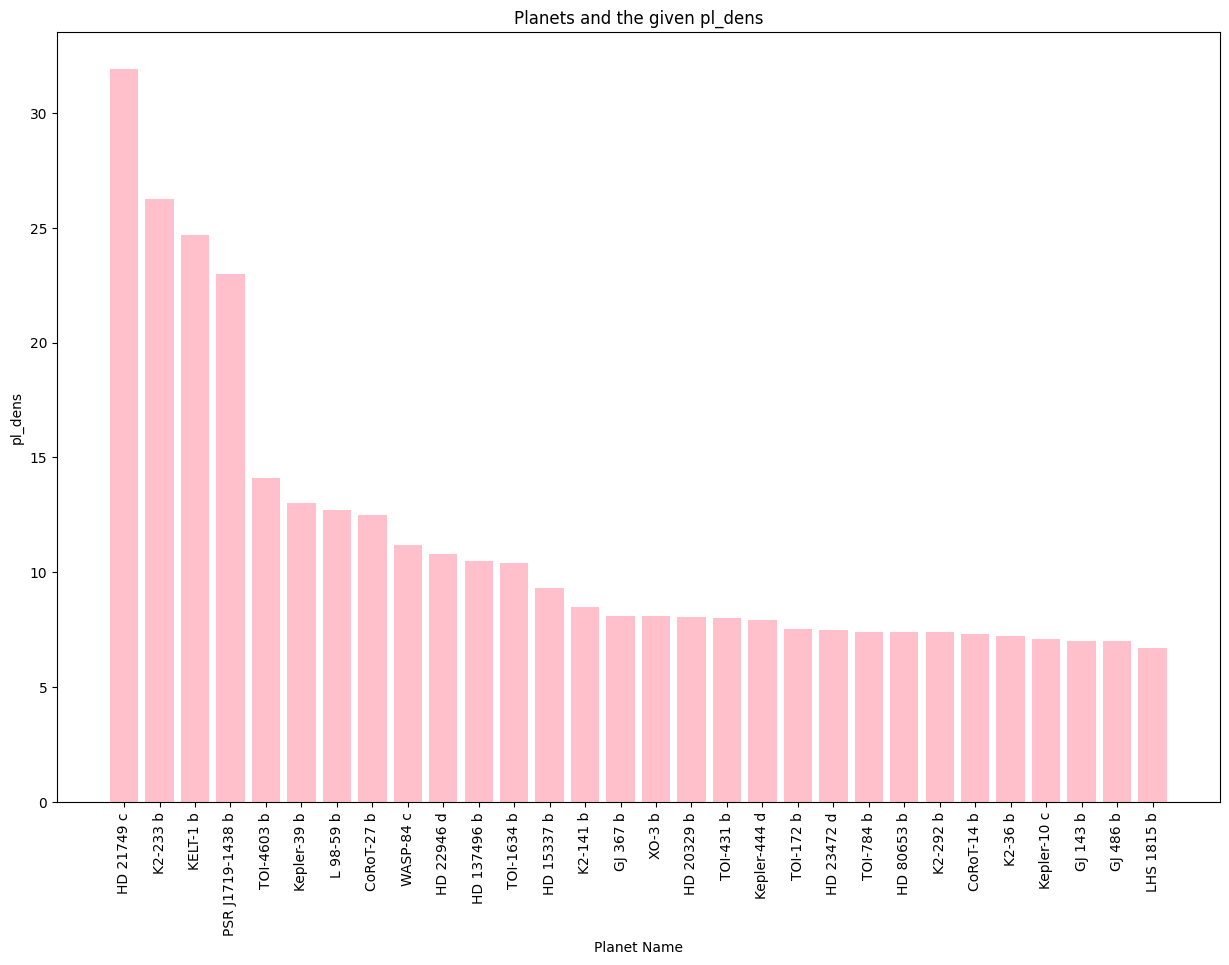

In [12]:
# Sort the DataFrame based on the metric, descending (so that the highest values come first)
sorted_df = merged_df.sort_values(by='pl_dens', ascending=False)

# Select the top 30
top30_df = sorted_df.head(30)

# Plotting
plt.figure(figsize=(15, 10))  
plt.bar(top30_df['pl_name'], top30_df['pl_dens'], color='pink') 
plt.xlabel('Planet Name')  
plt.ylabel('pl_dens') 
plt.title('Planets and the given pl_dens')  
plt.xticks(rotation=90)  # Rotates the X-axis labels to avoid overlapping
plt.show()

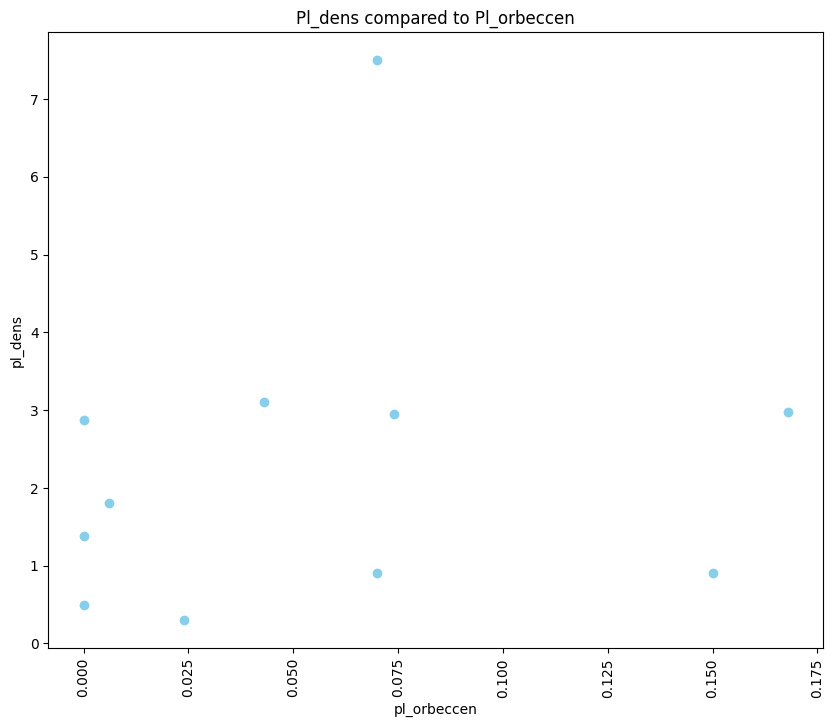

In [13]:
sorted_df = merged_ly_df.sort_values(by='pl_dens', ascending=False)

top30_df = sorted_df.head(30)

plt.figure(figsize=(10, 8))  
plt.scatter(top30_df['pl_orbeccen'], top30_df['pl_dens'], color='skyblue')  
plt.xlabel('pl_orbeccen')
plt.ylabel('pl_dens') 
plt.title('Pl_dens compared to Pl_orbeccen') 
plt.xticks(rotation=90)  
plt.show()